# TP2 Classification de voyelles par lois gaussiennes

Déposer le notebook sur moodle à la fin de la séance.

### Vérification des données


In [87]:
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
from math import *
from sklearn.metrics import confusion_matrix

In [2]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()

# Vérifier le contenu et la taille des matrices
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. TP1).
print(np.shape(app_aa))
#print(app_aa)
print(np.shape(app_ii))
#print(app_ii)
print(np.shape(app_uu))
#print(app_uu)

(80, 2)
(80, 2)
(80, 2)


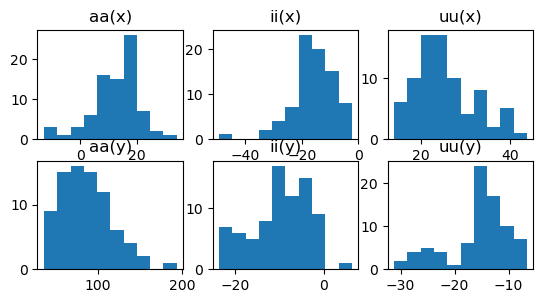

In [3]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace), 
# l'histogramme de chacune des classes : aa, uu et ii.
plt.figure()

plt.subplot(3,3,1)
plt.hist(app_aa[:,0])
plt.title('aa(x)')

plt.subplot(3,3,4)
plt.hist(app_aa[:,1])
plt.title('aa(y)')

plt.subplot(3,3,2)
plt.hist(app_ii[:,0])
plt.title('ii(x)')

plt.subplot(3,3,5)
plt.hist(app_ii[:,1])
plt.title('ii(y)')

plt.subplot(3,3,3)
plt.hist(app_uu[:,0])
plt.title('uu(x)')

plt.subplot(3,3,6)
plt.hist(app_uu[:,1])
plt.title('uu(y)')

plt.show()

In [4]:
# Que pouvez-vous conclure ? Ecrire quelques lignes pour expliquer.

On peut voir qu'avec la distribution des données sur les différents histogrammes (en fonction de x et de y pour chaque voyelle) cela pourrait correspondre au modèle d'une loi Gaussienne.

### Utilisation de lois gaussiennes

In [5]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe. 
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 
mean_aa = np.array([np.mean(app_aa[:,0]),np.mean(app_aa[:,1])])
cov_aa = np.cov(np.transpose(app_aa))
print(mean_aa)
print(np.shape(cov_aa))

mean_ii = np.array([np.mean(app_ii[:,0]),np.mean(app_ii[:,1])])
cov_ii = np.cov(np.transpose(app_ii))
print(mean_ii)
print(np.shape(cov_ii))

mean_uu = np.array([np.mean(app_uu[:,0]),np.mean(app_uu[:,1])])
cov_uu = np.cov(np.transpose(app_uu))
print(mean_uu)
print(np.shape(cov_uu))

[12.73410809 86.9221835 ]
(2, 2)
[-15.84258271  -9.71847791]
(2, 2)
[ 25.36460256 -15.63309221]
(2, 2)


La matrice de covariance de chaque voyelle est de dimension (80,80) et ses éléments diagonaux sont les variances et les éléments extra-diagonaux sont les covariances des couples de variables.

In [6]:
#4- RECONNAISSANCE : écrire une fonction classer qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe) 
# sur l'observation fournie en entrée :
# Exemple de résultat : 
# classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
# => no_classe = 1

#Fonction qui simplifie par la fonction log() l'expression de l'équation
def log_proba(observation, moyenne_modele, covariance_modele):
    s = (-1)*np.log(np.linalg.det(covariance_modele))
    s = s + (-1)*np.dot(np.dot(np.transpose(observation-moyenne_modele), np.linalg.inv(covariance_modele)), (observation-moyenne_modele))
    return s

#Fonction classer() qui renvoie la classe obtenue par maximum de vraisemblance sur l'estimation des lois gaussiennes
def classer(observation, moyenne_aa, covariance_aa, moyenne_uu, covariance_uu, moyenne_ii, covariance_ii):
    aa = log_proba(observation,moyenne_aa,covariance_aa)
    uu = log_proba(observation,moyenne_uu,covariance_uu)
    ii = log_proba(observation,moyenne_ii,covariance_ii)
    classe_pred = np.argmax((aa, uu, ii))   
    return classe_pred

In [7]:
#5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl

# Charger ces données de tests comme  pour les données d'apprentissage)
f = open('TST.pkl', 'rb')
dicoTST = pickle.load(f)
tst_aa = dicoTST["aa"]
tst_ii = dicoTST["ii"]
tst_uu = dicoTST["uu"]
f.close()

# Vérifier leur dimensions et leur contenu
print(np.shape(tst_aa))
print(tst_aa)

print(np.shape(tst_uu))
print(tst_uu)

print(np.shape(tst_ii))
print(tst_ii)

(20, 2)
[[ 11.77415839  54.17821404]
 [ 15.01573001  41.00905922]
 [  3.76834603  60.42549292]
 [  8.61862641  66.33990703]
 [ 11.98697752  43.57924851]
 [  1.95361559  86.89233931]
 [ 21.09936484  48.9952262 ]
 [ 17.92092173  38.67104421]
 [ -8.16984152 134.38344506]
 [  9.84447882  63.42633269]
 [ 12.98775544  51.44551405]
 [  4.40909376  97.4025495 ]
 [ 12.93888508  65.96746738]
 [ 12.33119532  39.06800473]
 [ -1.20195816  84.6821187 ]
 [ 10.40914543  59.72415969]
 [  7.55953152  35.81959626]
 [  6.44376576  88.21519067]
 [ 16.97234693  63.6014779 ]
 [ 16.89349548  36.20988916]]
(20, 2)
[[ 20.69086459 -10.74042558]
 [ 18.33295967  -9.25915595]
 [ 26.5921063  -12.80668524]
 [ 20.12523702 -10.47151906]
 [ 19.45505737 -10.80174397]
 [ 27.81528101 -17.32788383]
 [ 22.82048519 -13.50400695]
 [ 17.19206546  -9.20303751]
 [ 22.52456691 -15.52814939]
 [ 20.81882735 -13.456325  ]
 [ 14.93568592  -9.94655318]
 [ 19.86610964 -18.46660665]
 [ 17.04981331 -13.75748691]
 [ 15.14094214 -12.5012848

In [8]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification 
def tout_tester(tst_aa, tst_uu, tst_ii, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii):
    #On initialise les listes de résultats "vrais" et la liste de résultats "prédits"
    l_true = []
    l_res = []
    
    #On fait tourner l'algo sur tous les résultats
    for i in range(len(tst_aa)):
        l_true.append(0)
        l_res.append(classer(tst_aa[i,:], mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii))
        
    for i in range(len(tst_uu)):
        l_true.append(1)
        l_res.append(classer(tst_uu[i,:], mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii))
        
    for i in range(len(tst_ii)):
        l_true.append(2)
        l_res.append(classer(tst_ii[i,:], mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii))
    
    #On calcule la matrice de confusion à partir des deux listes ainsi que le taux de reconnaissance
    matConf = confusion_matrix(l_true, l_res)
    taux_reconnaissance = np.sum(np.matrix.diagonal(matConf))/60
    
    return (matConf, taux_reconnaissance)

In [9]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 
(matrice_confusion, taux_reco) = tout_tester(tst_aa, tst_uu, tst_ii, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii)

In [10]:
#8- Commenter les résultats obtenus :
print(f'Matrice de confusion:\n {matrice_confusion}')
print(f'Taux de reconnaissance: {taux_reco*100} %')

Matrice de confusion:
 [[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]
Taux de reconnaissance: 100.0 %


Ici le taux de reconnaissance est de 100% car toutes les données prédites correspondent aux données de base. On peut remarquer ça par le fait que la matrice de confusion soit une matrice diagonale.

### Visualisation  des résultats

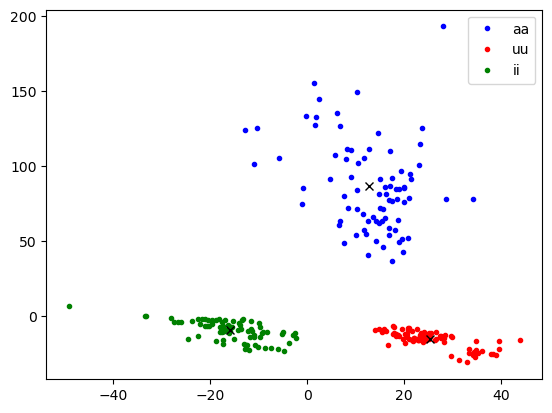

In [73]:
#9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant 
# aux données d'apprentissage
plt.figure()
plt.plot(app_aa[:,0], app_aa[:,1], '.', label="aa", color='blue')
plt.plot(app_uu[:,0], app_uu[:,1], '.', label="uu", color='red')
plt.plot(app_ii[:,0], app_ii[:,1], '.', label="ii", color='green')
plt.legend()


#10- Afficher les centroïdes des différentes classes.
plt.plot(np.mean(app_aa[:,0]), np.mean(app_aa[:,1]), 'x', color='black')
plt.plot(np.mean(app_uu[:,0]), np.mean(app_uu[:,1]), 'x', color='black')
plt.plot(np.mean(app_ii[:,0]), np.mean(app_ii[:,1]), 'x', color='black')
plt.show()

In [76]:
#11- Réaliser une animation pour l'affichage des points de test (un par un avec des couleurs par exemple...)
#Choisit une couleur d'affichage en fonction de la classe prédite
def chooseColor(test, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii):
    if (classer(test, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii) == 0): return 'blue'
    if (classer(test, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii) == 1): return 'red'
    if (classer(test, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii) == 2): return 'green'

#Animation et affichage des points de test
def afficherResultatsTest(tst_aa, tst_uu, tst_ii, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii):   
    for i in range(20):
        plt.plot(tst_aa[i,0], tst_aa[i,1], 'x', label='aa', color=chooseColor(tst_aa[i,:], mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii))
        plt.plot(tst_uu[i,0], tst_uu[i,1], 'x', label='uu', color=chooseColor(tst_uu[i,:], mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii))
        plt.plot(tst_ii[i,0], tst_ii[i,1], 'x', label='ii', color=chooseColor(tst_ii[i,:], mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii))

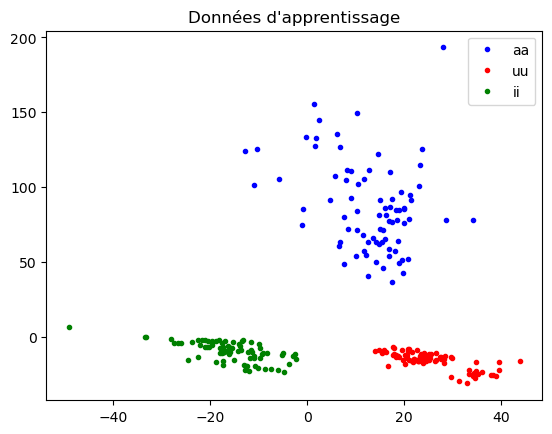

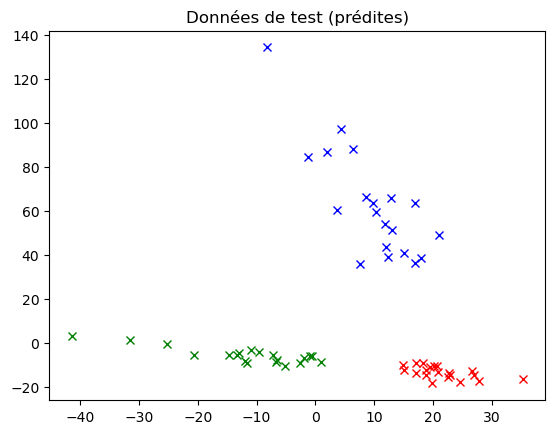

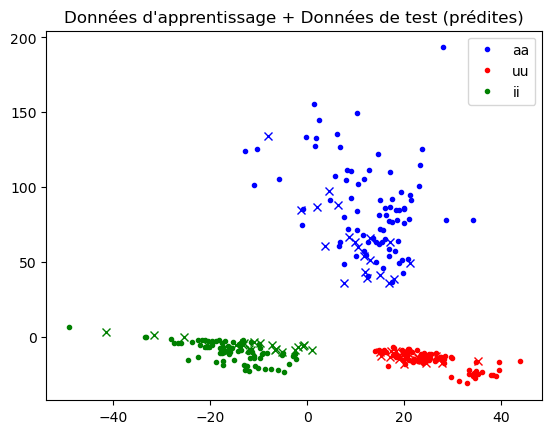

In [89]:
plt.figure()
plt.plot(app_aa[:,0], app_aa[:,1], '.', label="aa", color='blue')
plt.plot(app_uu[:,0], app_uu[:,1], '.', label="uu", color='red')
plt.plot(app_ii[:,0], app_ii[:,1], '.', label="ii", color='green')
plt.legend()
plt.title('Données d\'apprentissage')

plt.pause(1)

afficherResultatsTest(tst_aa, tst_uu, tst_ii, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii)
plt.title('Données de test (prédites)')

plt.pause(1)

plt.figure()
plt.plot(app_aa[:,0], app_aa[:,1], '.', label="aa", color='blue')
plt.plot(app_uu[:,0], app_uu[:,1], '.', label="uu", color='red')
plt.plot(app_ii[:,0], app_ii[:,1], '.', label="ii", color='green')
plt.legend()
afficherResultatsTest(tst_aa, tst_uu, tst_ii, mean_aa, cov_aa, mean_uu, cov_uu, mean_ii, cov_ii)
plt.title('Données d\'apprentissage + Données de test (prédites)')

plt.show()